# Question 1: When is it most profitable to release movies?

## Import all of the relevant data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# set table to variable
df = pd.read_csv('joined_gross_budget_cleaned.csv')

In [4]:
df.head() #checking the layout

,title,month,year,production_budget,domestic_gross,worldwide_gross,net_prof,net_margin_%
0,(500) Days of Summer,7.0,2009,7500000.0,32425665.0,34439060.0,26939060.0,78.22
1,10 Cloverfield Lane,3.0,2016,5000000.0,72082999.0,108286422.0,103286422.0,95.38
2,10 Things I Hate About You,3.0,1999,13000000.0,38177966.0,60413950.0,47413950.0,78.48
3,"10,000 B.C.",3.0,2008,105000000.0,94784201.0,269065678.0,164065678.0,60.98
4,12 Monkeys,12.0,1995,29000000.0,57141459.0,168841459.0,139841459.0,82.82


In [5]:
# checking for datatypes in table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
title                3657 non-null object
month                3657 non-null float64
year                 3657 non-null int64
production_budget    3657 non-null float64
domestic_gross       3657 non-null float64
worldwide_gross      3657 non-null float64
net_prof             3657 non-null float64
net_margin_%         3657 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 228.7+ KB


## Tidying up
Everything looks great, but the column 'month' is a float.  While that isn't too much of a problem, I intend to use this column as my x-axis in my plots.  From a style point of view, I don't want decimals there, so I will be changing that to an interger format.

In [12]:
# Change month from float to int
df['month'] = df['month'].astype(int)
df['month'].dtype

dtype('int32')

Since our question is specific to the time of the year to release movies, we are going to sort our values by 'month'.

In [13]:
# Change order to month
df = df.sort_values(by='month')
df.head()

,title,month,year,production_budget,domestic_gross,worldwide_gross,net_prof,net_margin_%
950,Fish Tank,1,2010,3000000.0,374675.0,5922292.0,2922292.0,49.34
2441,Smokin' Aces,1,2007,17000000.0,35662731.0,57263440.0,40263440.0,70.31
662,Darkness Falls,1,2003,7000000.0,32539681.0,47289758.0,40289758.0,85.20
1856,My Baby's Daddy,1,2004,12000000.0,17321573.0,17322212.0,5322212.0,30.72
1831,Movie 43,1,2013,10000000.0,8840453.0,31164747.0,21164747.0,67.91


### Subsetting our data

Even though we are looking for a relationship between net profitability and the time of the year a movie is released, we're going to bring in 'production_budget' and 'net_margin%' just in case we need them later. 

In [14]:
# separating the relevent values for profit margin
margin = df[['month','production_budget', 'net_margin_%', 'net_prof']]
margin.head()

,month,production_budget,net_margin_%,net_prof
950,1,3000000.0,49.34,2922292.0
2441,1,17000000.0,70.31,40263440.0
662,1,7000000.0,85.20,40289758.0
1856,1,12000000.0,30.72,5322212.0
1831,1,10000000.0,67.91,21164747.0


## Initial Plot
Let's plot it out so we see what our initial findings are.

[Text(0, 0.5, 'Net Profit in Millions'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Seasonal Profitability')]

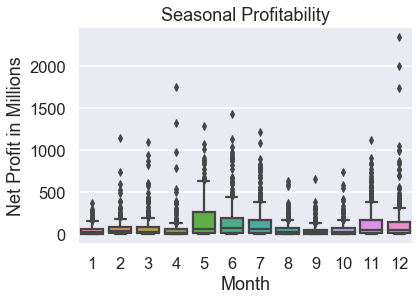

In [21]:
sns.set_style('darkgrid')
sns.set_context('talk')

# net profit plot
# using a lambda function to lower make our y-axis measured in millions 

sns.boxplot(x=margin['month'], y=margin['net_prof'].map(
    lambda x: x/1000000)).set(xlabel='Month', ylabel='Net Profit in Millions',
                                            title='Seasonal Profitability')

### Adjusting Our Plot
Time to filter out some outliers

In [22]:
#checking max of margin and max profit to determine y ranges
print(margin['net_margin_%'].max())
print(margin['net_prof'].max())


99.94
2351345279.0


In [32]:
# Eliminating outliers from 'net_prof'
limit_prof = margin[margin['net_prof'] < 500000000] 

Now that we've filtered out everything over 500 million, let's plot it again.

[Text(0, 0.5, 'Net Profit in Millions'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Seasonal Profitability')]

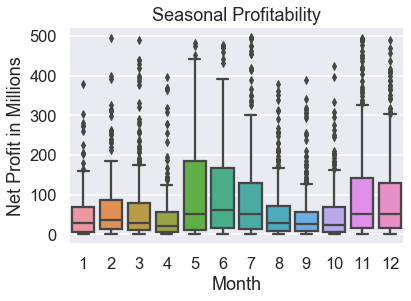

In [34]:
sns.set_style('darkgrid')
sns.set_context('talk')

# re-plotting 
sns.boxplot(x=limit_prof['month'], y=limit_prof['net_prof'].map(
                lambda x: x/1000000)).set(xlabel='Month', 
                                        ylabel='Net Profit in Millions',
                                            title='Seasonal Profitability')

## Conclusions:
While there are still plenty of outliers we can see that the month of May has the greatest potential earnings, with June having a higher median profit.


# Question: How has budget increased over the years?

Let's take a look at our original dataframe.

In [11]:
df.head()

,title,month,year,production_budget,domestic_gross,worldwide_gross,net_prof,net_margin_%
950,Fish Tank,1,2010,3000000.0,374675.0,5922292.0,2922292.0,49.34
310,Battle for the Planet of the Apes,1,1973,1800000.0,8800000.0,8800000.0,7000000.0,79.55
2731,The Boy Next Door,1,2015,4000000.0,36006065.0,53401938.0,49401938.0,92.51
2733,The Boys from Brazil,1,1978,12000000.0,19000000.0,19000000.0,7000000.0,36.84
2743,The Butterfly Effect,1,2004,13000000.0,57924679.0,95638592.0,82638592.0,86.41


## Tidying up
How many decades are covered in our sample size?

In [36]:
df['year'].value_counts()

2006    175
2010    170
2008    162
2011    161
2012    151
       ... 
1935      1
1937      1
1947      1
1955      1
1916      1
Name: year, Length: 92, dtype: int64

Our samples go back over 100 years!  Since we don't want to account for inflation and changes in cultural entertainment, we'll only include the last 30 years.

In [23]:
#filtering out dates prior to 1990
budget_years = df[df['year'] >= 1990]
budget_years.shape

(3207, 8)

## Plotting

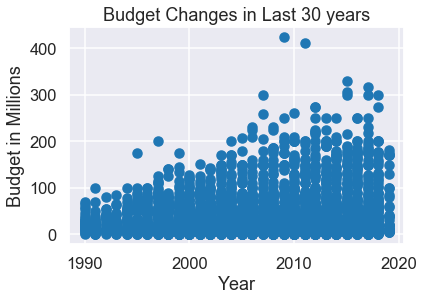

In [13]:
# plotting graph
plt.scatter(budget_years['year'], budget_years['production_budget'].map(
            lambda x: x/1000000), label=
            'Change over the years')
#adding labels
plt.xlabel('Year'), plt.ylabel('Budget in Millions')
plt.title('Budget Changes in Last 30 years')

plt.show()

This shows a trend, but it's a bit busy. Let's simplify!

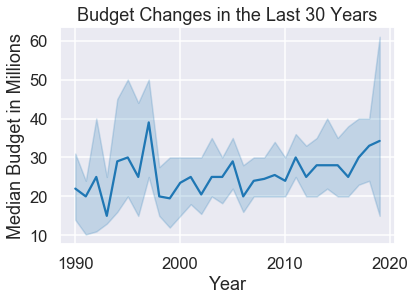

In [31]:
# creating plot and converting y-axis to be values of millions 
# Because our sample size is over 3,000, we're going to use the estimator 
# parameter to make sure that the plot function to bring back 
# median budget.
sns.set_style('darkgrid')
sns.set_context('talk')
ax = sns.lineplot(x=budget_years['year'], y=budget_years[
    'production_budget'].map(lambda x: x/1000000), data = budget_years, 
                  estimator=np.median).set(
                        xlabel='Year', ylabel='Median Budget in Millions',
                        title='Budget Changes in the Last 30 Years')
                 

## Conclusions:
We see that there was a drop in the early 90's, followed by a large spike, most likely as a result of the strong economy and the cost of practical effects.  The sudden drop in budget could probably be attributed to the decrease in practical effects and increase in use of computer generated graphics (the era of The Matrix was just on the horizon). Despite all of this, we can still see a steady increase in the median production budget over the last 30 years.
The cost of spectacle!